In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('dataset_35_dermatology (1).csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [5]:
data1=data.copy()

In [6]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [7]:
for column in data.columns:
    data[column]=pd.to_numeric(data[column], errors='coerce')

In [8]:
data['Age'] = data['Age'].astype(pd.Int64Dtype())

In [9]:
median = data['Age'].median()
data['Age'].fillna(median, inplace=True)
data['Age'] = data['Age'].replace(0,data['Age'].median())

In [10]:
new_data=data.copy()

In [11]:
data['class'].replace([1,2,3,4,5,6],['Psoriasis', 'Seboreic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea','Cronic_Dermatitis','Pityriasis_rubra_pilaris'],inplace=True)

In [12]:
x=new_data.drop('class',axis=1)

In [13]:
y=new_data['class']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [17]:
from sklearn.model_selection import cross_val_score


In [18]:
MNBC = MultinomialNB()
MNBC.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_train_pred_MNBC = MNBC.predict(X_train) # training model
y_test_pred_MNBC = MNBC.predict(X_test) # test model

In [20]:
#Evaluate Multinomial Naive Bayes model:
print("Multinomial Naive Bayes training set score:", accuracy_score(y_train, y_train_pred_MNBC))
print("Multinomial Naive Bayes test set score:", accuracy_score(y_test, y_test_pred_MNBC))


Multinomial Naive Bayes training set score: 0.984375
Multinomial Naive Bayes test set score: 0.9818181818181818


In [21]:
# Classification Report of Multinomial Naive Bayes Model
print(classification_report(y_test, y_test_pred_MNBC, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.94      0.94      0.94        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.93      0.93      0.93        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



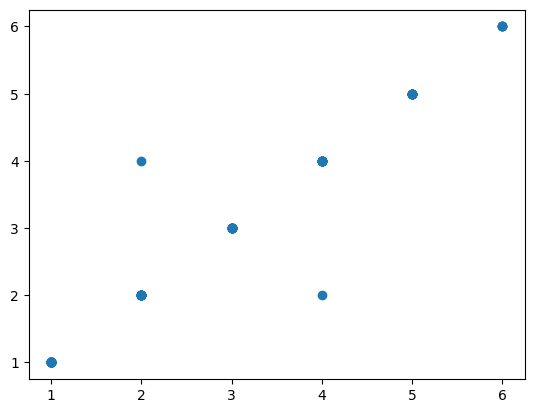

In [22]:
plt.scatter(y_test, y_test_pred_MNBC)

In [23]:
import pickle

In [24]:
# open a file where you want to store the data
file=open('naive bayes_model.pkl','wb')

# dump information to that file
pickle.dump(MNBC,file)